In [1]:
#Import libaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
path = r'/Users/emilypickett/Documents/InstaCart Basket Project'

In [3]:
#import all_merge
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'all_merged.pkl'))

### Consider PII
##### excluded first and last name column as contain PII and not needed for analysis

In [4]:
#exclude PII columns- first and last name
df = df.drop(columns = [ 'first_name', 'Surnam' ])

#### Creating region based on State column to compare customer behavior in different geographic areas

In [5]:
# Creating a loop for regions

result = []

for value in df['STATE']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')
    else:
        result.append('Unknown')  

In [6]:
#adding region column to dataframe
df['region'] = result

In [7]:
#checking region column
df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### Compare spending habits in each region

In [8]:
#create cross tab with region and spender
df2 = pd.crosstab(df['region'], df['spender'])

In [9]:
df2

spender,High spender,Low spender
region,,
Midwest,155932,7441350
Northeast,108180,5614511
South,209481,10582194
West,160271,8132559


In [10]:
#calcuate total customers in each region
total_customer_region = df.groupby('region')['user_id'].count()

In [11]:
#get proportion of count in percentage by dividing total customers in each region * 100
region_precent = Prop_count = df2.div(total_customer_region, axis = 0) *100

In [12]:
region_precent

spender,High spender,Low spender
region,,
Midwest,2.052459,97.946975
Northeast,1.890355,98.108859
South,1.941097,98.056957
West,1.932626,98.066373


Text(0.5, 1.0, 'Percent of High & Low Spenders by Region')

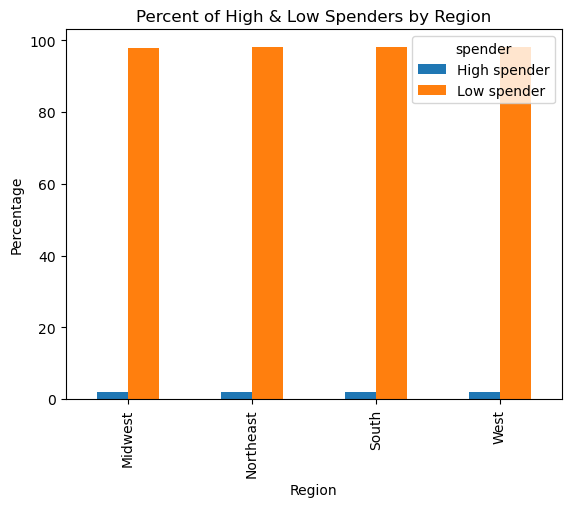

In [13]:
#create bar chart of results
bar_region = region_precent.plot.bar()
#add labels
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Percent of High & Low Spenders by Region')

In [14]:
#exporting visual
bar_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_region_spenders.png'))

### Create flag for low-activity customers

In [15]:
#create flag customers > 5 orders
df['low_activity'] = np.where(df['max_order'] < 5, 'Yes', 'No')

In [16]:
#checking flag
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,Gender,STATE,Age,date_joined,n_dependants,family_status,income,merge_2,region,low_activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No


In [17]:
#create new dataframe with only customer who have fewer than 5 orders
df_few = df[df['low_activity'] == 'Yes']

In [18]:
#exporting under 5 order sample
df_few.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'under_five_orders.csv'))

In [19]:
#remove under 5 from main dataframe
df = df[df['low_activity'] != 'Yes']

In [20]:
#exporting dataframe w/ over 5 orders
df.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'over_five_orders.csv'))